In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(context='poster', style='white')

([], <a list of 0 Text yticklabel objects>)

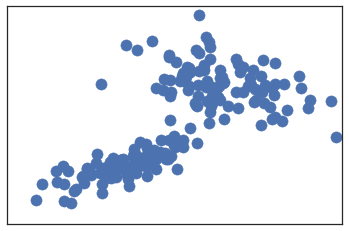

In [2]:
np.random.seed(1)
tgt = np.r_[
    np.random.multivariate_normal([0, 0], [[1, .8], [.8, 1]], size=100),
    np.random.multivariate_normal([2, 5], [[1, -.3], [-.3, 2]], size=100),
]
plt.scatter(*tgt.T)
plt.xlim(-3, 5)
plt.ylim(-4, 10)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

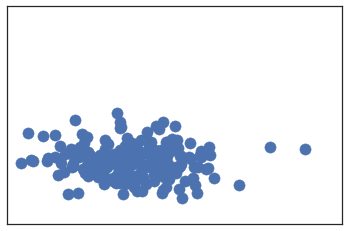

In [3]:
np.random.seed(2)
m0 = np.r_[
    np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=200),
]
plt.scatter(*m0.T)
plt.xlim(-3, 5)
plt.ylim(-4, 10)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

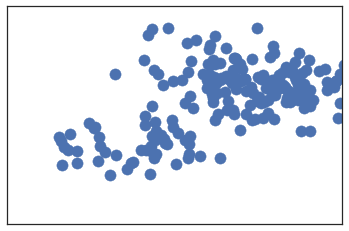

In [4]:
np.random.seed(3)
m1 = np.r_[
    np.random.multivariate_normal([0, 1], [[1, .3], [.3, 1]], size=50),
    np.random.multivariate_normal([3, 5], [[1.5, -.7], [-.7, 1.8]], size=150),
]
plt.scatter(*m1.T)
plt.xlim(-3, 5)
plt.ylim(-4, 10)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

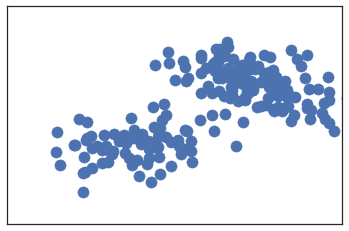

In [5]:
np.random.seed(2)
m2 = np.r_[
    np.random.multivariate_normal([0, 1], [[1, .3], [.3, 1]], size=80),
    np.random.multivariate_normal([3, 5], [[1, -.7], [-.7, 1.8]], size=130),
]
plt.scatter(*m2.T)
plt.xlim(-3, 5)
plt.ylim(-4, 10)
plt.xticks([])
plt.yticks([])

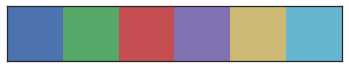

In [118]:
sns.palplot(sns.color_palette())

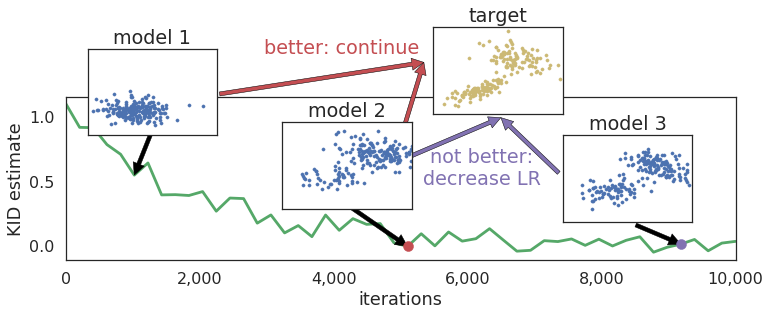

In [130]:
fig = plt.figure(figsize=(12, 3))
ax = plt.gca()

c1, c2, c3, c4, c5 = sns.color_palette(n_colors=5)
comma_formatter = mpl.ticker.FuncFormatter(lambda x, pos: '{:,}'.format(int(x)) if x == int(x) else str(x))

np.random.seed(4)
xs = np.linspace(1, 10000)
y = np.exp(-xs / 2000) + np.random.uniform(-.1, .1, size=xs.size)
ax.plot(xs, y, color=c2)
ax.set_ylabel('KID estimate')
ax.set_xlabel('iterations')
ax.xaxis.set_major_formatter(comma_formatter)
ax.set_xlim(0, xs[-1])

def inset(samps, p1, p2, s1=.15, s2=.4, color=c1):
    a = fig.add_axes([p1, p2, s1, s2])
    a.scatter(*samps.T, s=10, color=color)
    a.set_xlim(-3, 5)
    a.set_ylim(-4, 10)
    a.set_xticks([])
    a.set_yticks([])
    return a

at = inset(tgt, .55, .8, color=c5)
at.set_title('target')

a0 = inset(m0, .15, .7)
a0.set_title('model 1')
i0 = xs.searchsorted(1000)
ax.annotate("", xy=(xs[i0], y[i0]), xytext=(.2, .6), textcoords='figure fraction',
            arrowprops=dict(shrink=.0, facecolor='k'))

a1 = inset(m1, .375, .36)
a1.set_title('model 2')
i1 = xs.searchsorted(5000)
ax.annotate("", xy=(xs[i1], y[i1]), xytext=(.45, .35), textcoords='figure fraction',
            arrowprops=dict(shrink=.0, facecolor='k'))

p = (.55, .8)
ax.annotate("", xy=p, xytext=(.285, .7),
            xycoords='figure fraction', textcoords='figure fraction',
            arrowprops=dict(shrink=.0, facecolor=c3))
ax.annotate("", xy=p, xytext=(.525, .6),
            xycoords='figure fraction', textcoords='figure fraction',
            arrowprops=dict(shrink=.0, facecolor=c3))
ax.annotate("better: continue", xy=p, xytext=(-5, 5),
            xycoords='figure fraction', textcoords='offset points', ha='right', va='bottom',
            color=c3)
ax.scatter(xs[i1], y[i1], color=c3, s=100, zorder=100)


a2 = inset(m2, .7, .3)
a2.set_title('model 3')
i2 = xs.searchsorted(9000)
ax.annotate("", xy=(xs[i2], y[i2]), xytext=(.825, .285), textcoords='figure fraction',
            arrowprops=dict(shrink=.0, facecolor='k'))

p = (.65, .625)
ax.annotate("", xy=p, xytext=(.53, .5),
            xycoords='figure fraction', textcoords='figure fraction',
            arrowprops=dict(shrink=.0, facecolor=c4))
ax.annotate("", xy=p, xytext=(.725, .45),
            xycoords='figure fraction', textcoords='figure fraction',
            arrowprops=dict(shrink=.0, facecolor=c4))
ax.annotate("not better:\ndecrease LR", xy=p, xytext=(-19, -30),
            xycoords='figure fraction', textcoords='offset points', ha='center', va='top',
            color=c4)
ax.scatter(xs[i2], y[i2], color=c4, s=100, zorder=100)

fig.savefig('../figs/KID-LR.pdf', bbox_inches='tight', pad_inches=0)